<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN800%20module%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNSUPERVISED MACHINE LEARNING APPLICATION

In [ ]:
# Runtime → Restart runtime

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import umap.umap_ as umap
import hdbscan

In [ ]:
data = pd.read_csv("/content/amazon_data_cleaned.csv")
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city_x,customer_state_x,customer_unique_id,...,payment_type,payment_installments,payment_value,delivery_delay,actual_delivery_time,order_item_total,total_orders,total_spent,recency_days,frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,credit_card,1.0,18.12,7,8,38.71,1,116.13,331,3
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,2.00,7,8,38.71,1,116.13,331,3
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,franca,SP,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,18.59,7,8,38.71,1,116.13,331,3
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,sao bernardo do campo,SP,af07308b275d755c9edb36a90c618231,...,boleto,1.0,141.46,5,13,141.46,1,141.46,35,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,sao paulo,SP,3a653a41f6f9fc3d2a113cf8398680e8,...,credit_card,3.0,179.12,17,9,179.12,1,179.12,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113385,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,taboao da serra,SP,da62f9e57a76d978d02ab5362c509660,...,credit_card,3.0,195.00,1,22,195.00,1,195.00,204,1
113386,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,fortaleza,CE,737520a9aad80b3fbbdad19b66b37b30,...,credit_card,5.0,271.01,5,24,271.01,1,271.01,367,1
113387,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,canoas,RS,5097a5312c8b157bb7be58ae360ef43c,...,credit_card,4.0,441.16,20,17,220.58,1,441.16,232,2
113388,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,canoas,RS,5097a5312c8b157bb7be58ae360ef43c,...,credit_card,4.0,441.16,20,17,220.58,1,441.16,232,2


In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Drop duplicates
data= data.drop_duplicates()

In [ ]:
# Display descriptive statistics
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,payment_sequential,payment_installments,payment_value,delivery_delay,actual_delivery_time,order_item_total,total_orders,total_spent,recency_days,frequency
count,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.0,113390.000000,113390.000000,113390.000000
mean,35080.723027,1.196843,120.184057,20.023985,48.801755,785.793059,1.089937,2.942367,172.241850,11.049352,12.015045,140.208042,1.0,211.279625,239.496137,1.640215
std,29844.853275,0.701270,182.761548,15.752500,10.018253,650.986313,0.682057,2.777802,266.596347,10.158747,9.450433,189.840303,0.0,421.736620,152.889419,2.335849
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,0.000000,-189.000000,0.000000,6.080000,1.0,10.070000,0.000000,1.000000
25%,11320.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,1.000000,61.000000,6.000000,6.000000,55.310000,1.0,68.050000,115.000000,1.000000
50%,24325.000000,1.000000,74.900000,16.320000,52.000000,601.000000,1.000000,2.000000,108.140000,12.000000,10.000000,91.860000,1.0,119.760000,220.000000,1.000000
75%,58768.750000,1.000000,133.732500,21.200000,57.000000,985.000000,1.000000,4.000000,189.370000,16.000000,15.000000,157.450000,1.0,211.730000,349.000000,2.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,26.000000,24.000000,13664.080000,146.000000,209.000000,6929.310000,1.0,13664.080000,695.000000,63.000000


In [ ]:
#Select Features for Segmentation
features = ['recency_days', 'frequency', 'total_spent', 'delivery_delay', 'actual_delivery_time']
X = data[features].copy()

In [ ]:
#Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.59849967,  0.58213975, -0.22561485, -0.39860915, -0.42485495],
       [ 0.59849967,  0.58213975, -0.22561485, -0.39860915, -0.42485495],
       [ 0.59849967,  0.58213975, -0.22561485, -0.39860915, -0.42485495],
       ...,
       [-0.04903001,  0.15402808,  0.54508283,  0.88108182,  0.5274866 ],
       [-0.04903001,  0.15402808,  0.54508283,  0.88108182,  0.5274866 ],
       [-0.43493154, -0.2740836 , -0.29501866,  0.58576852, -0.53067068]])

In [ ]:
#Reduce Dimensionality for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#Helper Function to Evaluate Clustering ---
def evaluate_clustering(X, labels):
    s = silhouette_score(X, labels)
    d = davies_bouldin_score(X, labels)
    c = calinski_harabasz_score(X, labels)
    return s, d, c

In [ ]:
# ✅ Store results
results = []

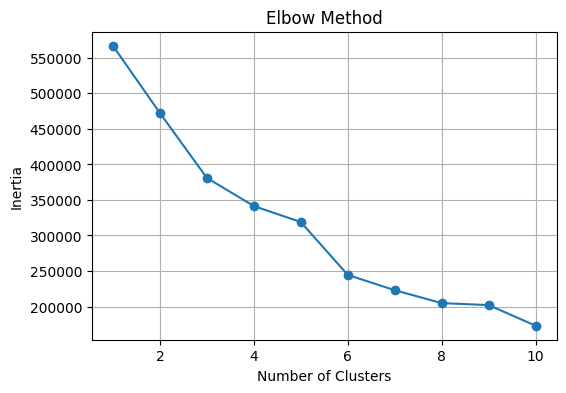

In [ ]:
# Elbow Method
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results.append(("KMeans", *evaluate_clustering(X_scaled, kmeans_labels)))

Match the predicted labels with ground truth labels

In [ ]:
Kmeans= data
Kmeans['predicted']= kmeans_labels
kmeans

KMeans(n_clusters=4, random_state=42)

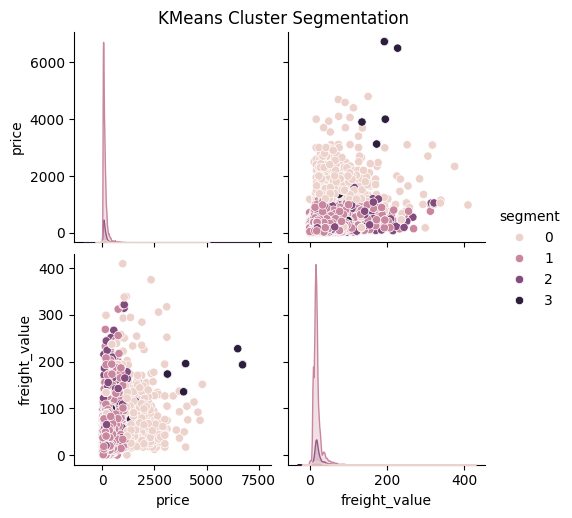

In [ ]:
import seaborn as sns

# Add the KMeans cluster labels to the dataframe
data['segment'] = kmeans_labels

sns.pairplot(data, hue='segment', vars=['price', 'freight_value'])
plt.suptitle('KMeans Cluster Segmentation', y=1.02)
plt.show()

In [20]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
results.append(("GMM", *evaluate_clustering(X_scaled, gmm_labels)))

In [ ]:
#HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=10)
hdb_labels = hdb.fit_predict(X_scaled)
# Filter out noise for evaluation
mask = hdb_labels != -1
if len(set(hdb_labels[mask])) > 1:
    results.append(("HDBSCAN", *evaluate_clustering(X_scaled[mask], hdb_labels[mask])))
else:
   results.append(("HDBSCAN", np.nan, np.nan, np.nan))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The Silhouette Score is a metric used to evaluate the quality of clusters in unsupervised learning, especially in clustering algorithms like K-Means, Agglomerative Clustering, or DBSCAN.

In [21]:
# Silhouette Score
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette score for k={k}: {score}")

Silhouette score for k=2: 0.4296408897721612
Silhouette score for k=3: 0.3771636955864714
Silhouette score for k=4: 0.3860552384634839
Silhouette score for k=5: 0.38600999067734404
Silhouette score for k=6: 0.3029874860546241
Silhouette score for k=7: 0.24163646117791238
Silhouette score for k=8: 0.25250275484805623
Silhouette score for k=9: 0.21409729325510732
Silhouette score for k=10: 0.23253927955839795


In [22]:
#Show Results ---
eval_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print("\n📊 Model Evaluation Metrics:")
print(eval_df)


📊 Model Evaluation Metrics:
     Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   KMeans    0.386055        1.108300       24969.580972
1      GMM    0.020974        4.342640        7405.646543
2  HDBSCAN   -0.243684        0.807329         423.656520
3      GMM    0.020974        4.342640        7405.646543


In [25]:
# Visualize Clustering
def plot_clusters(X_vis, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels, palette="tab10", s=60)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [26]:
# Reduce Dimensionality with UMAP for Visualization
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisati

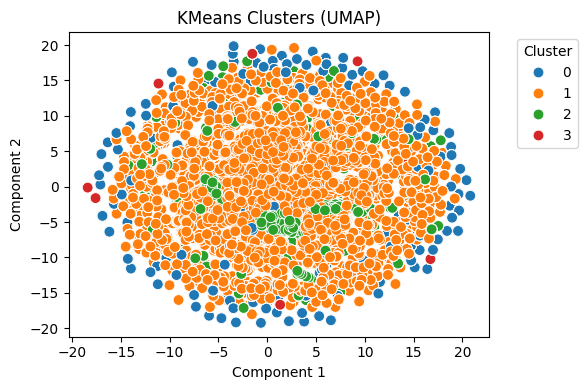

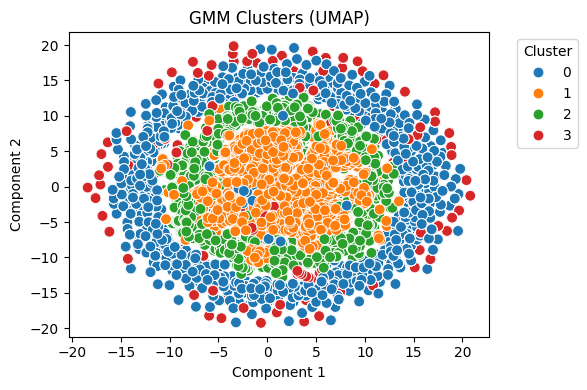

/tmp/ipython-input-25-660808405.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


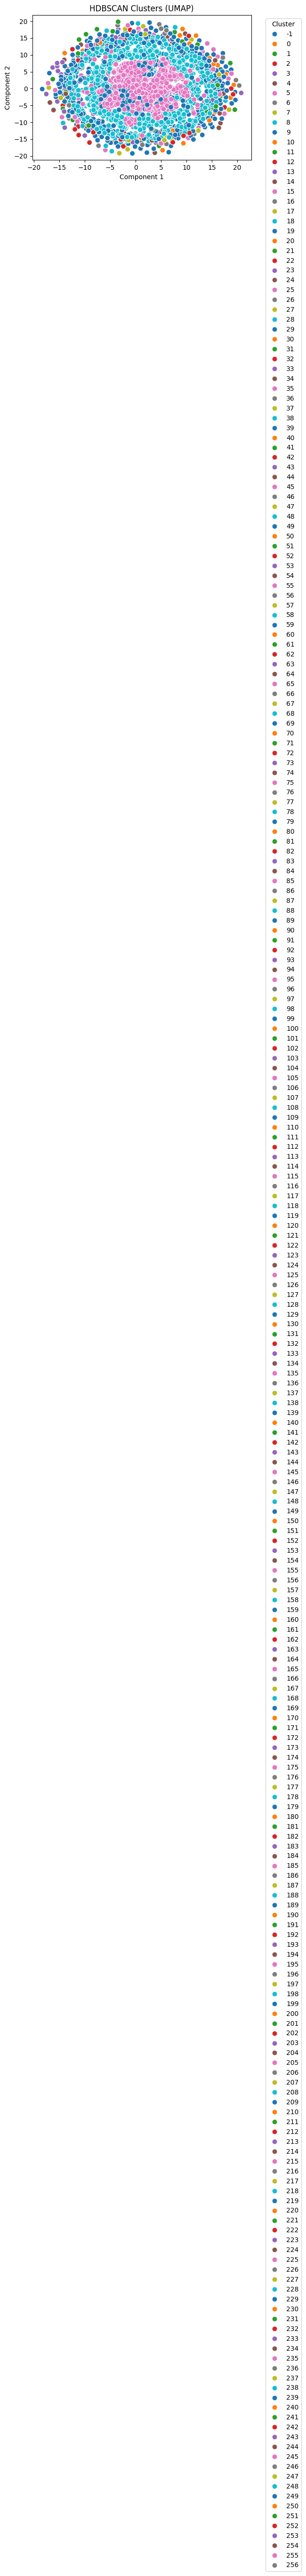

In [28]:

# Plot each
plot_clusters(X_umap, kmeans_labels, "KMeans Clusters (UMAP)")
plot_clusters(X_umap, gmm_labels, "GMM Clusters (UMAP)")
plot_clusters(X_umap, hdb_labels, "HDBSCAN Clusters (UMAP)")

Supervised Learning to Predict Customer Segments


In [29]:
# Encode payment_type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['payment_type_encoded'] = le.fit_transform(data['payment_type'])

In [30]:
# Define Features and Target for Supervised Learning
supervised_features = ['total_spent', 'delivery_delay', 'actual_delivery_time', 'recency_days', 'frequency', 'payment_type_encoded']
X_sup = data[supervised_features]
y_sup = data['segment']

# ✅ Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sup, y_sup, test_size=0.2, random_state=42)

In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📘 Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))


📘 Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00     18950
           2       1.00      1.00      1.00      2834
           3       1.00      0.98      0.99        45

    accuracy                           1.00     22678
   macro avg       1.00      0.99      1.00     22678
weighted avg       1.00      1.00      1.00     22678

Accuracy: 0.9990739924155569
F1 Score: 0.9990735711840506


In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n📘 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


📘 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       849
           1       1.00      1.00      1.00     18950
           2       0.99      0.99      0.99      2834
           3       0.52      0.73      0.61        45

    accuracy                           0.99     22678
   macro avg       0.86      0.91      0.88     22678
weighted avg       0.99      0.99      0.99     22678

Accuracy: 0.9937825205044537
F1 Score: 0.9939178598883862


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


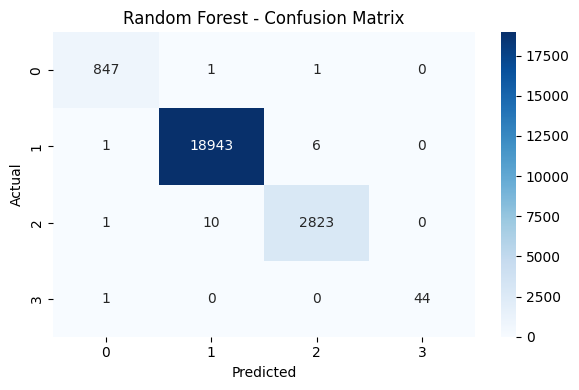

In [33]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()